#### Named Entity Recognition

In [1]:
!pip install spacy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
import pandas
book=pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data Science Assignments/Assignment 11 - Text Mining/Amazon - moile case reviews.txt",error_bad_lines=False)

In [3]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

["This is a best case I have ever purchased. When Galaxy M51 launched there were only less mobile cases put there and I didn't want to go with high end cases which were looking classy but not upto to the mark.This case from GiftKart didn't had any reviews though, so I bought it with a doubt.. and I was not disappointed and amazed by the packing and a motivational message in the pack with Steve Jobs picture.",
 "This is an awesome armour protection for samsung M51. The laser cutting is so precise it looks and feels premium. You can use mobile without any drop worries. Also the stand at the back is helpful to be used as mobile stand and alternatively can also be used as ring holder. The magnetic holder works perfectly. Overall this cover is the best buy with these many added advantages at an affordable price. Bought it for ₹250. Don't think just blindly go for it. You won't regret.",
 'Amazing and durable product. Looking stylish 😎 better than others and value for the price. Go for its b

In [4]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful

2021-03-07 00:33:51.271096: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-03-07 00:33:51.271129: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



You can now load the package via spacy.load('en_core_web_sm')


In [5]:
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm")

one_block = book[4]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [6]:
one_block

'Cut 2 cut fix ... amazing to buy. Happy for the item paid... can go for it. 1 star deducted for Amazon delivery... they refuse to come at home with a excuse that they have big vehicle...wherein a big truck can also pass through the road. AMAZON HAS TO REALLY WORK ON THIS.'

In [7]:
for token in doc_block[0:20]:
    print(token, token.pos_)

Cut VERB
2 NUM
cut NOUN
fix NOUN
... PUNCT
amazing ADJ
to PART
buy VERB
. PUNCT
Happy ADJ
for ADP
the DET
item NOUN
paid VERB
... PUNCT
can AUX
go VERB
for ADP
it PRON
. PUNCT


In [8]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['paid', 'go', 'star', 'deducted', 'delivery', 'refuse', 'come', 'home', 'excuse', 'have', 'vehicle', 'truck', 'pass', 'road', 'HAS', 'WORK']


In [9]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,cut,2
1,fix,1
2,buy,1
3,item,1
4,paid,1
5,go,1
6,star,1
7,deducted,1
8,delivery,1
9,refuse,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

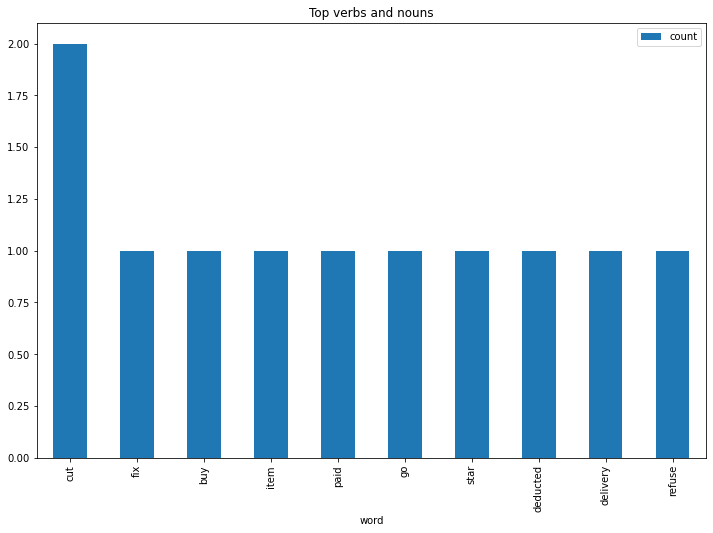

In [10]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#### Emotion Mining

In [11]:
#Sentiment analysis
afinn = pd.read_csv('C:/Users/navee/OneDrive/Desktop/Data Science Docs/Python/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [12]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
book=pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data Science Assignments/Assignment 11 - Text Mining/Amazon - moile case reviews.txt",error_bad_lines=False)
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False

In [14]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[5:15]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Also the stand at the back is helpful to be used as mobile stand and alternatively can also be used as ring holder.',
 'The magnetic holder works perfectly.',
 'Overall this cover is the best buy with these many added advantages at an affordable price.',
 'Bought it for ₹250.',
 "Don't think just blindly go for it.",
 "You won't regret.",
 'Amazing and durable product.',
 'Looking stylish 😎 better than others and value for the price.',
 'Go for its beautiful product.',
 'Wow amazing case.']

In [15]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,This is a best case I have ever purchased.
1,When Galaxy M51 launched there were only less ...
2,This is an awesome armour protection for samsu...
3,The laser cutting is so precise it looks and f...
4,You can use mobile without any drop worries.
...,...
171,But makes the phone very bulky.
172,Adds considerable bulk to an already chunky ph...
173,Prize is very high original prize cover 250 i ...
174,It feels solid.


In [16]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [17]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [18]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [19]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [20]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     9
1    68
2     9
3    11
4     8
5    23
6     5
7    16
8     4
9     7
Name: word_count, dtype: int64

In [21]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
25,Exceptional quality and majestic.This black an...,7,40
45,This item is the perfect fit for the samsung g...,7,35
14,Wow amazing case.,8,3
46,It fits perfectly and feels like a good case.,9,9
66,"I like everything, the material that it was bu...",11,49
112,My son use to throw phones and this is a best ...,14,33
34,All in all its a great back cover indeed which...,14,55
126,Excellent quality.. perfect fit.. feels sturdy...,14,23
76,Everything is good and I'm satisfied with this...,14,66
156,Excellent product and amazing packing by the s...,18,43


In [22]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    176.000000
mean       2.062500
std        3.228722
min       -4.000000
25%        0.000000
50%        2.000000
75%        3.000000
max       18.000000
Name: sentiment_value, dtype: float64

In [23]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
3,The laser cutting is so precise it looks and f...,-1,11
4,You can use mobile without any drop worries.,-4,8
8,Bought it for ₹250.,0,4
9,Don't think just blindly go for it.,0,7
10,You won't regret.,-2,3


In [24]:
sent_df[sent_df['sentiment_value']>=10].head()

,sentence,sentiment_value,word_count
34,All in all its a great back cover indeed which...,14,55
66,"I like everything, the material that it was bu...",11,49
76,Everything is good and I'm satisfied with this...,14,66
112,My son use to throw phones and this is a best ...,14,33
126,Excellent quality.. perfect fit.. feels sturdy...,14,23


In [25]:
sent_df['index']=range(0,len(sent_df))

C:\Users\navee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

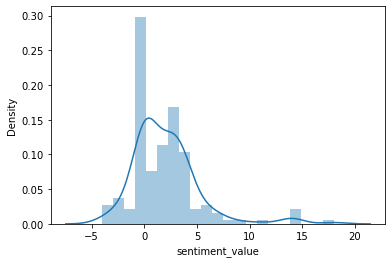

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

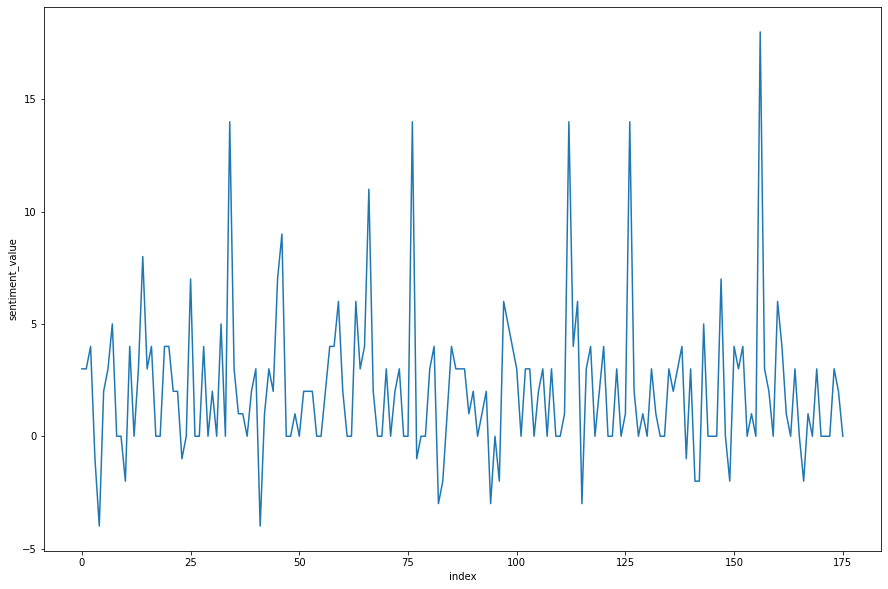

In [27]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

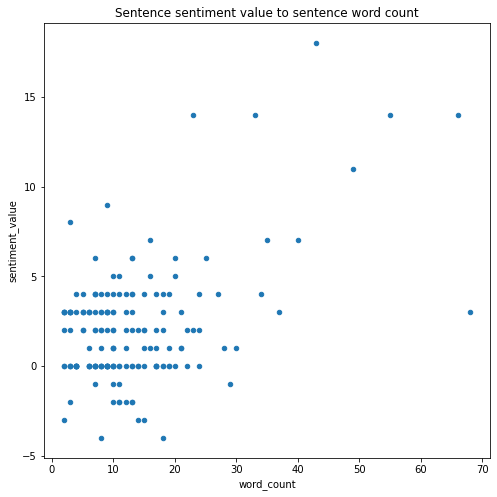

In [28]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')